In [89]:
'''Predicting Pulsar Stars'''
#binary classification algorithm

#Load Models
import time
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import neighbors, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split, RepeatedStratifiedKFold

#shows visualization in line -> replaces plt.show
%matplotlib inline

In [90]:
#IMPORTING DATA
data = pd.read_csv('Datasets/pulsar_star_dataset/pulsar_data_train.csv')


In [91]:
'''DATA TREATMENT'''
#describes testing set shape, null values anda data info
  
print("---------------------------------------------------")
print("Dataset's Shape: ", data.shape)

print("--------------------------------------------------- ")
print("Null Values: ")
print(data.isna().sum())

print("--------------------------------------------------- ")
print("Data Info: ")
print(data.info())


---------------------------------------------------
Dataset's Shape:  (12528, 9)
--------------------------------------------------- 
Null Values: 
 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64
--------------------------------------------------- 
Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated

In [92]:
#As all columns are relevant datapoints, none are droped 
data.head()


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


<AxesSubplot:>

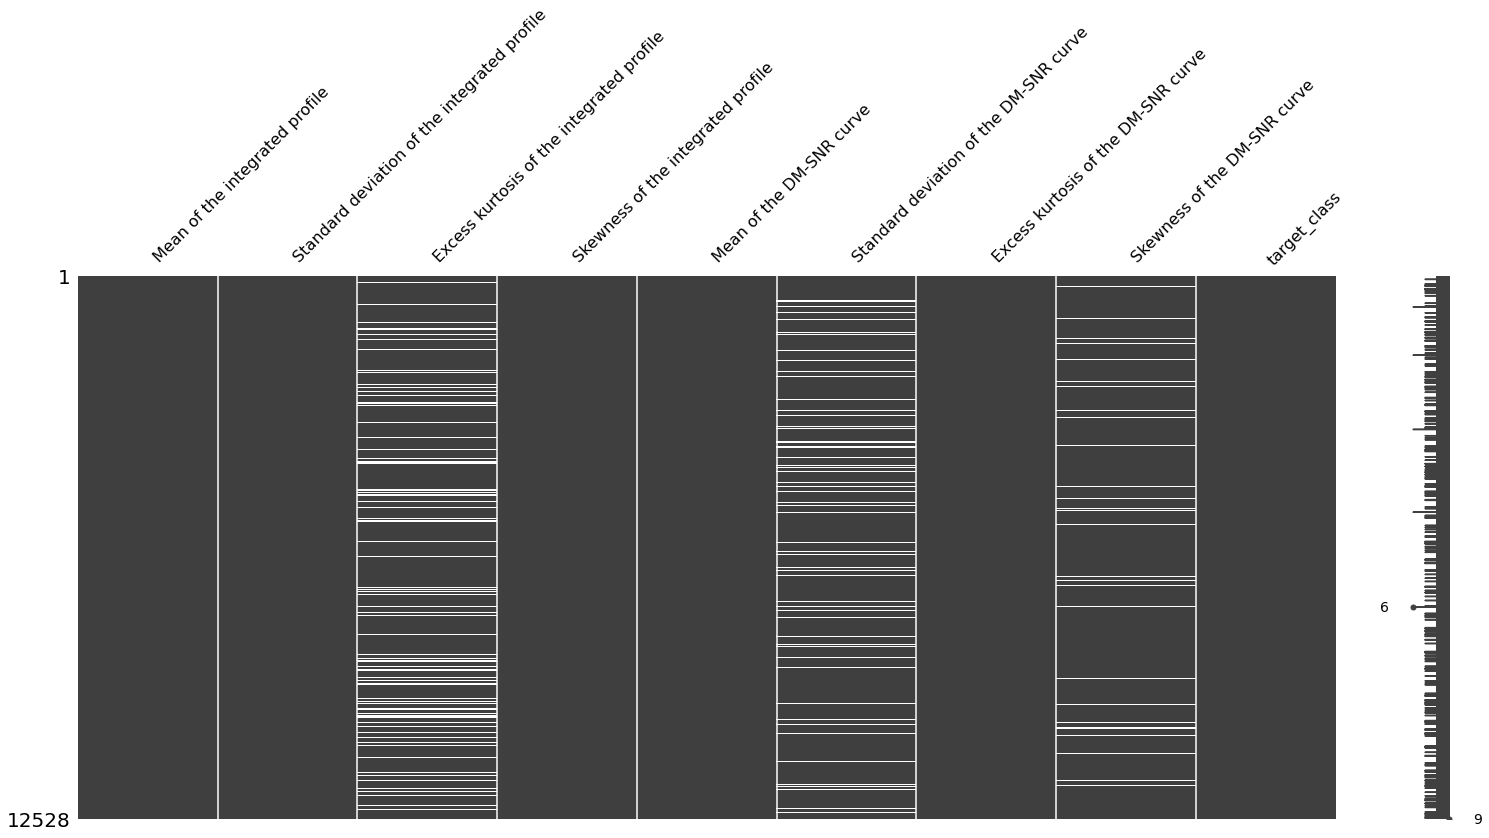

In [93]:
#demonstrates Nan values within the dataset
#white strips represents Nan values in a column

msno.matrix(data)


In [94]:
#drops rows with Nan values
data.dropna(inplace=True)

#demonstrates the data shape to confirm the treated data has at least 1000 entrie
print("---------------------------------------------------")
print("Dataset's Shape: ", data.shape)

print("--------------------------------------------------- ")
print("Null Values: ")
print(data.isna().sum())

print("--------------------------------------------------- ")
print("Data Info: ")
print(data.info())


---------------------------------------------------
Dataset's Shape:  (9273, 9)
--------------------------------------------------- 
Null Values: 
 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64
--------------------------------------------------- 
Data Info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9273 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                9273 

In [95]:
#As all columns are relevant datapoints, none are droped 
data.head()


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0


<AxesSubplot:>

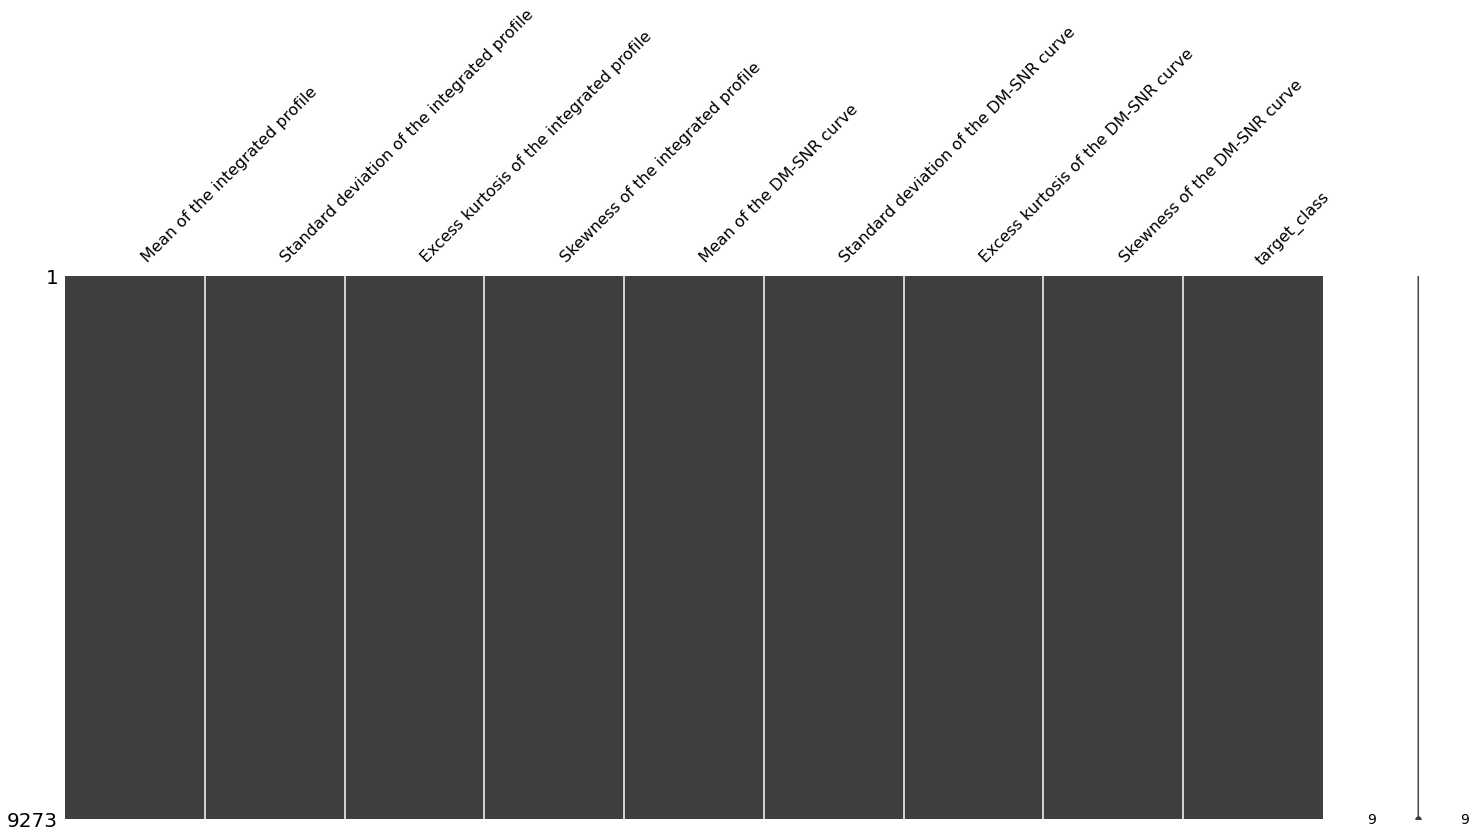

In [96]:
#demonstrates Nan values within the dataset
#lack of white strips represents the lack of Nan values

msno.matrix(data)


In [97]:
#As target_class is already binary, theres not need to transform it into categortical values
#gives general infor about the data

data.describe().T


,count,mean,std,min,25%,50%,75%,max
Mean of the integrated profile,9273.0,111.133750,25.686405,6.187500,100.984375,115.234375,127.328125,189.734375
Standard deviation of the integrated profile,9273.0,46.514053,6.781320,24.772042,42.398382,46.895026,51.001785,91.808628
Excess kurtosis of the integrated profile,9273.0,0.479546,1.071155,-1.738021,0.024497,0.223858,0.472066,8.069522
Skewness of the integrated profile,9273.0,1.790673,6.286567,-1.791886,-0.188021,0.202884,0.930710,68.101622
Mean of the DM-SNR curve,9273.0,12.735359,29.766782,0.213211,1.910535,2.797659,5.459866,211.948997
Standard deviation of the DM-SNR curve,9273.0,26.327860,19.542634,7.370432,14.376641,18.435186,28.387019,110.642211
Excess kurtosis of the DM-SNR curve,9273.0,8.327933,4.549914,-2.636857,5.788817,8.427475,10.721934,34.539844
Skewness of the DM-SNR curve,9273.0,105.783345,108.166669,-1.976976,34.917943,83.151969,139.770330,1191.000837
target_class,9273.0,0.091664,0.288567,0.000000,0.000000,0.000000,0.000000,1.000000


<AxesSubplot:xlabel='target_class', ylabel='count'>

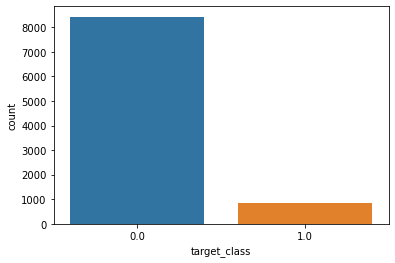

In [98]:
#quantifies how many pulsar stars exist in the training set
sns.countplot(x=data['target_class'],label="pulsar_star")


In [99]:
#FEATURE SELECTION
#finds correlations between data

data_corr = data.corr()
data_corr.head()


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.554197,-0.872497,-0.734920,-0.299984,-0.307431,0.236010,0.146103,-0.675819
Standard deviation of the integrated profile,0.554197,1.000000,-0.528370,-0.542560,-0.011061,-0.059486,0.036907,0.030959,-0.368223
Excess kurtosis of the integrated profile,-0.872497,-0.528370,1.000000,0.944715,0.421126,0.436362,-0.344571,-0.216748,0.790866
Skewness of the integrated profile,-0.734920,-0.542560,0.944715,1.000000,0.415570,0.415902,-0.328328,-0.204109,0.704743
Mean of the DM-SNR curve,-0.299984,-0.011061,0.421126,0.415570,1.000000,0.796449,-0.614526,-0.353186,0.407043


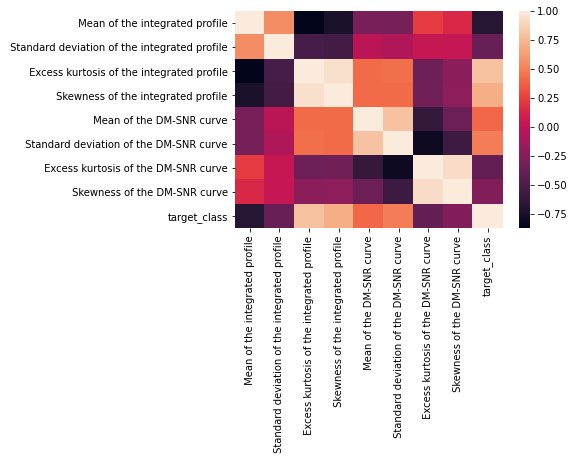

In [100]:
#heatmap analyses the feature correlation
def heatmap(data):
    plt.figure()
    sns.heatmap(data_corr)

heatmap(data_corr)


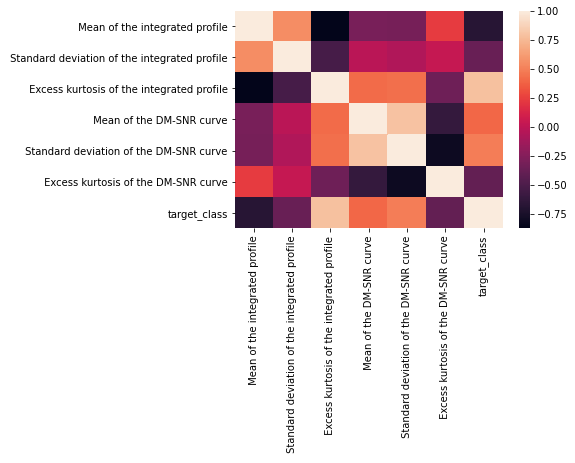

In [101]:
#cheecks and eliminates one of the features that have a correlation of over .85
corr_columns = np.full((data_corr.shape[0],), True, dtype=bool)

for i in range(data_corr.shape[0]):
    for j in range(i+1, data_corr.shape[0]):
        if data_corr.iloc[i,j] >= 0.85:
            if corr_columns[j]:
                corr_columns[j] = False

selected_columns = data.columns[corr_columns]
data_f = data[selected_columns]


#To check there are no correlation between features with values over .85
data_corr = data_f.corr()
heatmap(data_corr)


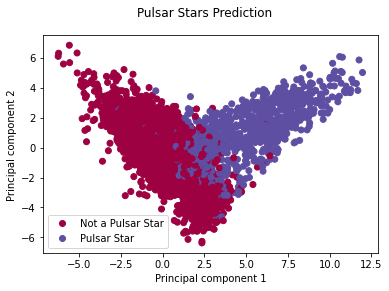

In [102]:
#PCA PLOT
def PCA_Plot(data):

    #defining variables
    data_X = data.iloc[:,0:-1].values
    data_y = pd.DataFrame(data_f.iloc[:,-1].values, columns=['target_class'])


    #Scale X values to remove mean and improve accuracy
    X_std = StandardScaler().fit_transform(data_X)


    #PCA
    #Tripathi, A. (2019) A Complete Guide to Principal Component Analysis – PCA in Machine Learning, Data Science Duniya. 
    #Available at: https://ashutoshtripathi.com/2019/07/11/a-complete-guide-to-principal-component-analysis-pca-in-machine-learning/ (Accessed: 27 April 2021).
    pca = PCA(n_components=2) 
    principalComponents = pca.fit_transform(X_std) 
    principalDf = pd.DataFrame(data=principalComponents , columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, data_y], axis = 1)


    #PCA_Plot
    plt.figure()
    plt.xlabel('Principal component 1')
    plt.ylabel('Principal component 2')
    plt.suptitle("Pulsar Stars Prediction")
    labels = ["Not a Pulsar Star","Pulsar Star"]
    scatter = plt.scatter(data=finalDf, x="principal component 1", y="principal component 2", c="target_class",cmap='Spectral', label = labels)
    plt.legend(handles=scatter.legend_elements()[0], labels=labels)


PCA_Plot(data)


In [103]:
def train_test_set(data):
    
    #defining variables
    data_X = data.iloc[:,0:-1].values
    data_y = data.iloc[:,-1].values

    #scale dataf_X values to remove mean and improve accuracy
    #not applying scaling on y_train and y_test since their values are already 0 and 1.
    X_scaler = StandardScaler().fit_transform(data_X)

    #defining training and testing variables
    X_train, X_test, y_train, y_test = train_test_split(X_scaler, data_y, test_size=0.3, random_state=0)

    return (X_train, X_test, y_train, y_test)


In [104]:
#acuracy results from models
def accuracy_results(model, X_train, y_train, X_test, y_test, y_test_pred):

    #evaluate a score by cross-validation
    scores = cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy')

    print("--------------------------------------------------- ")
    print("Model training accuracy: ", round(model.score(X_train, y_train), 5))
    print("Model testing accuracy: ", round(model.score(X_test, y_test), 5))
    print("Maximun Scaled accuracy: ", round(accuracy_score(y_test, y_test_pred), 5))
    print("Cross Validation Accuracy: ", round(scores.mean(), 5))
    print("--------------------------------------------------- \n")



In [105]:
#LEARNING MODELS

'''Logistic Regression'''
def logistic_reg(data):

    #start process time
    start_time = time.time()
    #gets vars dataf_X, dataf_y, X_train, X_test, y_train, y_test with data
    X_train, X_test, y_train, y_test = train_test_set(data)


    #training the model
    model_LR = LogisticRegression()
    model_LR = model_LR.fit(X_train, y_train)
    X_train_pred = model_LR.predict(X_train)
    y_test_pred = model_LR.predict(X_test)


    #Confusion Matrix Normalized 
    conf_matrix = confusion_matrix(y_test, y_test_pred, normalize='all')

    #prints accuracies results and scores
    accuracy_results(model_LR, X_train, y_train, X_test, y_test, y_test_pred)
    
    #end process time 
    end_time = time.time()
    print("Process Time(s): ", round(end_time-start_time, 5))
    print("--------------------------------------------------- ")

    #heatmap plot of CONFUSION MATRIX
    labels = ['NOT_pulsar_star', 'pulsar_star']
    heatmap = sns.heatmap(conf_matrix, annot=True)
    heatmap.set_xticklabels(labels)
    heatmap.set_yticklabels(labels)
    heatmap.set(ylabel="Real values", xlabel="Predicted values")


--------------------------------------------------- 
Model training accuracy:  0.97889
Model testing accuracy:  0.9752
Maximun Scaled accuracy:  0.9752
Cross Validation Accuracy:  0.97556
--------------------------------------------------- 

Process Time:  0.07389
--------------------------------------------------- 


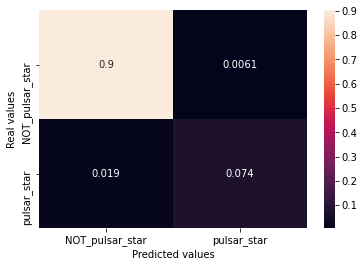

In [113]:
#Logistic Regression with original data
logistic_reg(data)

--------------------------------------------------- 
Model training accuracy:  0.97843
Model testing accuracy:  0.97484
Maximun Scaled accuracy:  0.97484
Cross Validation Accuracy:  0.9752
--------------------------------------------------- 

Process Time:  0.06307
--------------------------------------------------- 


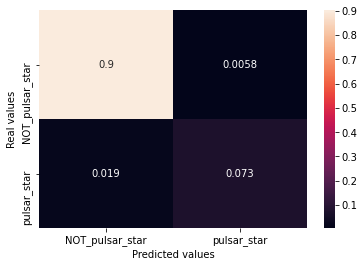

In [114]:
#Logistic Regression with data with feature scalling (data_f)
logistic_reg(data_f)

In [108]:
#Logistic Regression with grid search
def logistic_reg_grid_search(data):

    #start process time 
    start_time = time.time()

    #gets vars dataf_X, dataf_y, X_train, X_test, y_train, y_test with data
    X_train, X_test, y_train, y_test = train_test_set(data)

    
    #GRID SEARCH

    #Defining parameters
    #defining solvers optimises the algorithm
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    #penalises the hyperparameter
    penalty = ['l1', 'l2']
    #strengh of penalty
    c_param = [100, 10, 1.0, 0.1, 0.01, 0.001]

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    param_GS = dict(solver=solvers, penalty=penalty, C=c_param)
    model_GS = GridSearchCV(estimator=LogisticRegression(), param_grid=param_GS, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
    
    #fitting the model
    model_GS = model_GS.fit(X_train, y_train)
    X_train_pred = model_GS.predict(X_train)
    y_test_pred = model_GS.predict(X_test)

    #Confusion Matrix Normalized 
    conf_matrix = confusion_matrix(y_test, y_test_pred, normalize='all')

    #prints accuracies results and scores
    print("--------------------------------------------------- ")
    print("Best Accuracy: ", round(model_GS.best_score_, 5))
    print("Best hyperparameters: ", model_GS.best_params_)
    accuracy_results(model_GS, X_train, y_train, X_test, y_test, y_test_pred)

    #end process time 
    end_time = time.time()
    print("Process Time(s): ", round(end_time-start_time, 5))
    print("--------------------------------------------------- ")

    #heatmap plot of CONFUSION MATRIX
    labels = ['NOT_pulsar_star', 'pulsar_star']
    heatmap = sns.heatmap(conf_matrix, annot=True)
    heatmap.set_xticklabels(labels)
    heatmap.set_yticklabels(labels)
    heatmap.set(ylabel="Real values", xlabel="Predicted values")


--------------------------------------------------- 
Best Accuracy:  0.97982
Best hyperparameters:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
--------------------------------------------------- 
Model training accuracy:  0.97997
Model testing accuracy:  0.97699
Maximun Scaled accuracy:  0.97699
Cross Validation Accuracy:  0.97664
--------------------------------------------------- 

Process Time:  12.20074
--------------------------------------------------- 


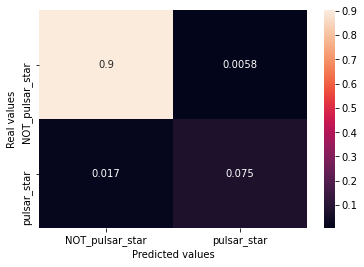

In [109]:
#Logistic regression with original data and grid search
logistic_reg_grid_search(data)

--------------------------------------------------- 
Best Accuracy:  0.97905
Best hyperparameters:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
--------------------------------------------------- 
Model training accuracy:  0.97936
Model testing accuracy:  0.97448
Maximun Scaled accuracy:  0.97448
Cross Validation Accuracy:  0.97592
--------------------------------------------------- 

Process Time:  9.42057
--------------------------------------------------- 


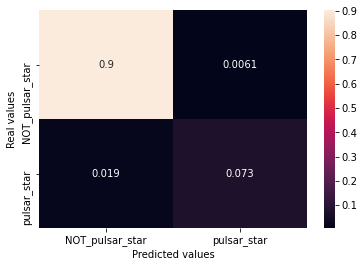

In [110]:
#Logistic regression with feature selection data and grid search
logistic_reg_grid_search(data_f)

In [111]:
#Logistic Regression with random search
def logistic_reg_random_search(data):

    #start process time 
    start_time = time.time()

    #gets vars dataf_X, dataf_y, X_train, X_test, y_train, y_test with data
    X_train, X_test, y_train, y_test = train_test_set(data)

    
    #RANDOM SEARCH

    #Defining parameters
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l1', 'l2']
    c_param = [100, 10, 1.0, 0.1, 0.01, 0.001]

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    param_RS = dict(solver=solvers, penalty=penalty, C=c_param)
    
    model_RS = RandomizedSearchCV(LogisticRegression(), param_RS, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
    
    #fitting the model
    model_RS = model_RS.fit(X_train, y_train)
    X_train_pred = model_RS.predict(X_train)
    y_test_pred = model_RS.predict(X_test)

    #Confusion Matrix Normalized 
    conf_matrix = confusion_matrix(y_test, y_test_pred, normalize='all')

    #prints accuracies results and scores
    print("--------------------------------------------------- ")
    print("Best Accuracy: ", round(model_RS.best_score_, 5))
    print("Best hyperparameters: ", model_RS.best_params_)
    accuracy_results(model_RS, X_train, y_train, X_test, y_test, y_test_pred)

    #end process time 
    end_time = time.time()
    print("Process Time(s): ", round(end_time-start_time, 5))
    print("--------------------------------------------------- ")

    #heatmap plot of CONFUSION MATRIX
    labels = ['NOT_pulsar_star', 'pulsar_star']
    heatmap = sns.heatmap(conf_matrix, annot=True)
    heatmap.set_xticklabels(labels)
    heatmap.set_yticklabels(labels)
    heatmap.set(ylabel="Real values", xlabel="Predicted values")


SyntaxError: unmatched ')' (<ipython-input-111-3ee745bea855>, line 39)

In [ ]:
#Logistic regression with original data and random search
logistic_reg_random_search(data)

In [ ]:
#Logistic regression with feature selection data and random search
logistic_reg_random_search(data_f)

In [ ]:
'''KNeighbours'''
def KN_Neighbors(data):

    #start process time 
    start_time = time.time()

    #gets vars dataf_X, dataf_y, X_train, X_test, y_train, y_test with data
    X_train, X_test, y_train, y_test = train_test_set(data)

    #training the model
    model_KN = KNeighborsClassifier()
    model_KN = model_KN.fit(X_train, y_train)
    X_train_pred = model_KN.predict(X_train)
    y_test_pred = model_KN.predict(X_test)

    #Confusion Matrix Normalized 
    conf_matrix = confusion_matrix(y_test, y_test_pred, normalize='all')

    #prints accuracies results and scores
    accuracy_results(model_KN, X_train, y_train, X_test, y_test, y_test_pred)

    #end process time 
    end_time = time.time()
    print("Process Time(s): ", round(end_time-start_time, 5))
    print("--------------------------------------------------- ")

    #heatmap plot of CONFUSION MATRIX
    labels = ['NOT_pulsar_star', 'pulsar_star']
    heatmap = sns.heatmap(conf_matrix, annot=True)
    heatmap.set_xticklabels(labels)
    heatmap.set_yticklabels(labels)
    heatmap.set(ylabel="Real values", xlabel="Predicted values")


In [ ]:
#KNNeighbors with original data
KN_Neighbors(data)

In [ ]:
#KNNeighbors with feature selection data
KN_Neighbors(data_f)

In [ ]:
#KNNeighbors with grid search
def KN_Neighbors_grid_search(data):

    #start process time 
    start_time = time.time()

    #gets vars dataf_X, dataf_y, X_train, X_test, y_train, y_test with data
    X_train, X_test, y_train, y_test = train_test_set(data)

    
    #GRID SEARCH

    #Defining parameters
    n_neighbors = range(1, 31)
    #checks uniform or distance
    weights = ['uniform', 'distance']
    #metrics
    metric = ['euclidian', 'manhattan', 'minkowski']

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    param_GS = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)
    model_GS = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_GS, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
    
    #fitting the model
    model_GS = model_GS.fit(X_train, y_train)
    X_train_pred = model_GS.predict(X_train)
    y_test_pred = model_GS.predict(X_test)

    #Confusion Matrix Normalized 
    conf_matrix = confusion_matrix(y_test, y_test_pred, normalize='all')

    #prints accuracies results and scores
    print("--------------------------------------------------- ")
    print("Best Accuracy: ", round(model_GS.best_score_, 5))
    print("Best hyperparameters: ", model_GS.best_params_)
    accuracy_results(model_GS, X_train, y_train, X_test, y_test, y_test_pred)

    #end process time 
    end_time = time.time()
    print("Process Time(s): ", round(end_time-start_time, 5))
    print("--------------------------------------------------- ")

    #heatmap plot of CONFUSION MATRIX
    labels = ['NOT_pulsar_star', 'pulsar_star']
    heatmap = sns.heatmap(conf_matrix, annot=True)
    heatmap.set_xticklabels(labels)
    heatmap.set_yticklabels(labels)
    heatmap.set(ylabel="Real values", xlabel="Predicted values")


In [ ]:
#KNNeighbors with original data with grid search
KN_Neighbors_grid_search(data)

In [ ]:
#KNNeighbors with feature selection data with grid search
KN_Neighbors_grid_search(data_f)

In [ ]:
#KNNeighbors with random search
def KN_Neighbors_random_search(data):

    #start process time 
    start_time = time.time()

    #gets vars dataf_X, dataf_y, X_train, X_test, y_train, y_test with data
    X_train, X_test, y_train, y_test = train_test_set(data)


    #Defining parameters
    n_neighbors = range(1, 31, 2)
    #checks uniform or distance
    weights = ['uniform', 'distance']
    #metrics
    metric = ['euclidian', 'manhattan', 'minkowski']

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    param_RS = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)
    model_RS = RandomizedSearchCV(KNeighborsClassifier(), param_RS, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
    
    #fitting the model
    model_RS = model_RS.fit(X_train, y_train)
    X_train_pred = model_RS.predict(X_train)
    y_test_pred = model_RS.predict(X_test)

    #Confusion Matrix Normalized 
    conf_matrix = confusion_matrix(y_test, y_test_pred, normalize='all')

    #prints accuracies results and scores
    print("--------------------------------------------------- ")
    print("Best Accuracy: ", round(model_RS.best_score_, 5))
    print("Best hyperparameters: ", model_RS.best_params_)
    accuracy_results(model_RS, X_train, y_train, X_test, y_test, y_test_pred)

    #end process time 
    end_time = time.time()
    print("Process Time(s): ", round(end_time-start_time, 5))
    print("--------------------------------------------------- ")

    #heatmap plot of CONFUSION MATRIX
    labels = ['NOT_pulsar_star', 'pulsar_star']
    heatmap = sns.heatmap(conf_matrix, annot=True)
    heatmap.set_xticklabels(labels)
    heatmap.set_yticklabels(labels)
    heatmap.set(ylabel="Real values", xlabel="Predicted values")



In [ ]:
#KNNeighbors with original data with random search
KN_Neighbors_random_search(data)

In [ ]:
#KNNeighbors with feature selection data and random search
KN_Neighbors_random_search(data_f)